# Application created durring realisation of POBR subject at EItI.

In [3]:
%matplotlib inline
import cv2

from matplotlib import pyplot as plt
import numpy as np
import time as t
import pandas as pd

print(cv2.__version__)

3.2.0


In [ ]:
def custom_convert(image):    
    img = np.zeros_like(image)
    img[:,:,0] = image[:,:,2]
    img[:,:,1] = image[:,:,1]
    img[:,:,2] = image[:,:,0]
    return img

def show_image(cv_image):
    rows, cols, *channels = cv_image.shape
    channels = channels and channels[0]
    image = cv_image
    print(channels)

    if channels == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #img2 = custom_convert(img)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

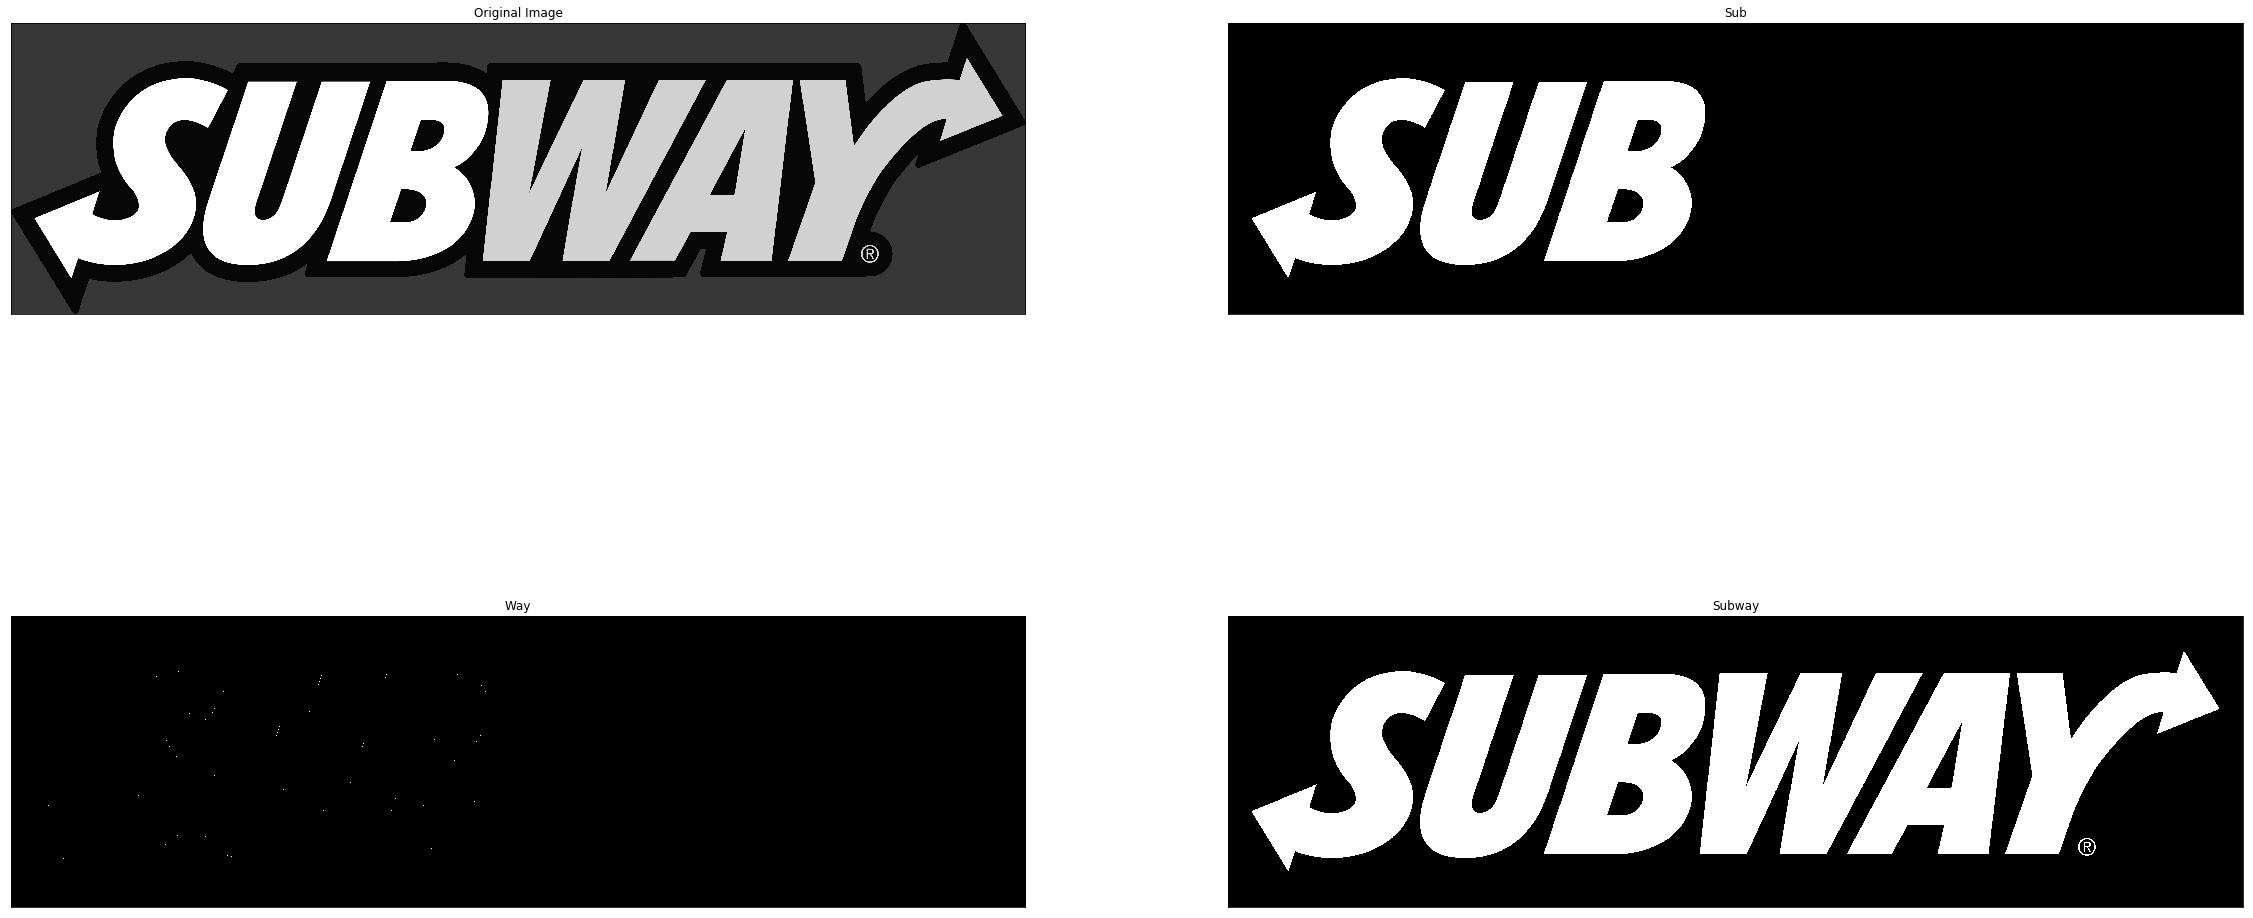

In [303]:
logo = cv2.imread("subway_logo.png", 3)
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

sub = cv2.inRange(logo, 250, 255)
way = cv2.inRange(logo, 230, 240)
subway = cv2.inRange(logo, 181, 255)

titles = ['Original Image','Sub','Way','Subway']
images = [logo, sub, way, subway]

plt.figure(figsize=(40,20))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
# Affine
img = cv2.imread('subway_logo.png', 3)
rows, cols, channels = img.shape

def rotate_image(mat, angle):
  # angle in degrees

  height, width = mat.shape[:2]
  image_center = (width/2, height/2)

  rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

  abs_cos = abs(rotation_mat[0,0])
  abs_sin = abs(rotation_mat[0,1])

  bound_w = int(height * abs_sin + width * abs_cos)
  bound_h = int(height * abs_cos + width * abs_sin)

  rotation_mat[0, 2] += bound_w/2 - image_center[0]
  rotation_mat[1, 2] += bound_h/2 - image_center[1]

  rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
  return rotated_mat

stats = pd.DataFrame

def analyze(image):
    rotation_moments = {}
    for a in range(0,360):
        for hu in cv2.HuMoments(cv2.moments(rotate_image(way, a))):
            rotation_moments[a] = hu

    return {'rotation': rotation_moments}

stats = {"sub": analyze(sub),
         "way": analyze(way),
         "subway": analyze(subway) }

values = []
for word, analyze in stats.items():
    for transform, analyze_results in analyze.items():
        for transform_value, hu_values in analyze_results.items():
            hus = {hu_level + 1 : hu_value[0] for hu_level, hu_value in enumerate(hu_values)}
            values.append({ 'word': word,
                            'transform': transform,
                            'transform_value': transform_value,
                            **hus })

frame = pd.DataFrame(values)
frame[frame['word'] == 'sub'].describe()
frame[frame['word'] == 'way'].describe()
frame[frame['word'] == 'subway'].describe()

In [ ]:
stats

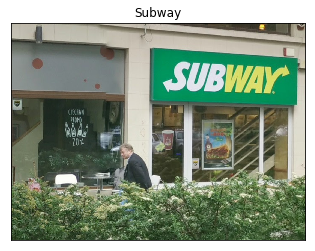

In [149]:
logo = cv2.imread("subway_1.png")
logo[2]
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

logo.shape
# def rgb2cmyk(img):
#     for (int i = 0; i < img.rows; i++) {
#         for (int j = 0; j < img.cols; j++) {
#             float r = (int)rgb[2].at<uchar>(i, j) / 255.;
#             float g = (int)rgb[1].at<uchar>(i, j) / 255.;
#             float b = (int)rgb[0].at<uchar>(i, j) / 255.;
#             float k = std::min(std::min(1- r, 1- g), 1- b);         
 
#             cmyk[0].at<uchar>(i, j) = (1 - r - k) / (1 - k) * 255.;
#             cmyk[1].at<uchar>(i, j) = (1 - g - k) / (1 - k) * 255.;
#             cmyk[2].at<uchar>(i, j) = (1 - b - k) / (1 - k) * 255.;
#             cmyk[3].at<uchar>(i, j) = k * 255.;
#         }
#     }
# image = cv2.cvtColor(logo, cv2.COLOR_BGR2)

# plt.figure(figsize=(40,20))

plt.subplot(1,1,1),plt.imshow(logo)
plt.title(titles[i])
plt.xticks([]),plt.yticks([])

plt.show()

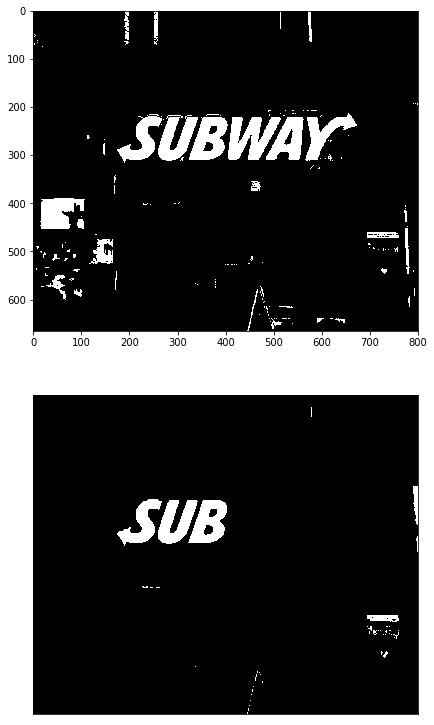

In [578]:
logo = cv2.imread("images/subway_2.png")

#logo[:,:,:] = 0
plt.figure(figsize=(40,20))

logo = cv2.cvtColor(logo, cv2.COLOR_BGR2HSV)
h = logo[:,:,0]
s = logo[:,:,1]
v = logo[:,:,2]

way = np.where((h > 20) & (h < 36) & (v > 200) & (s > 150), 255, 0)
sub = np.where((s < 30) & (v > 220), 255, 0)

way = np.maximum(sub, way)
kernel = np.ones((5,5),np.uint8)

# way = cv2.erode((way *1.0).astype(np.float32), kernel, iterations = 1)
# way = cv2.dilate((way *1.0).astype(np.float32), kernel, iterations = 1)

# sub = cv2.erode((sub *1.0).astype(np.float32), kernel, iterations = 1)
# sub = cv2.dilate((sub *1.0).astype(np.float32), kernel, iterations = 1)

plt.subplot(3,1,1),plt.imshow(way, cmap="gray")

logo = cv2.dilate(logo[:,:,2], kernel)
# logo = logo[:,:,logo[:,:,0] == 21]
plt.subplot(3,1,1),plt.imshow(way, cmap="gray")

way = np.where((h > 50) & (s < 50) & (v > 200), 255, 0)

# way = cv2.erode((way *1.0).astype(np.float32), kernel, iterations = 1)
# way = cv2.dilate((way *1.0).astype(np.float32), kernel, iterations = 1)

# sub = cv2.erode((sub *1.0).astype(np.float32), kernel, iterations = 1)
# sub = cv2.dilate((sub *1.0).astype(np.float32), kernel, iterations = 1)



plt.subplot(3,1,2),plt.imshow(way, cmap="gray")
plt.xticks([]),plt.yticks([])

plt.show()

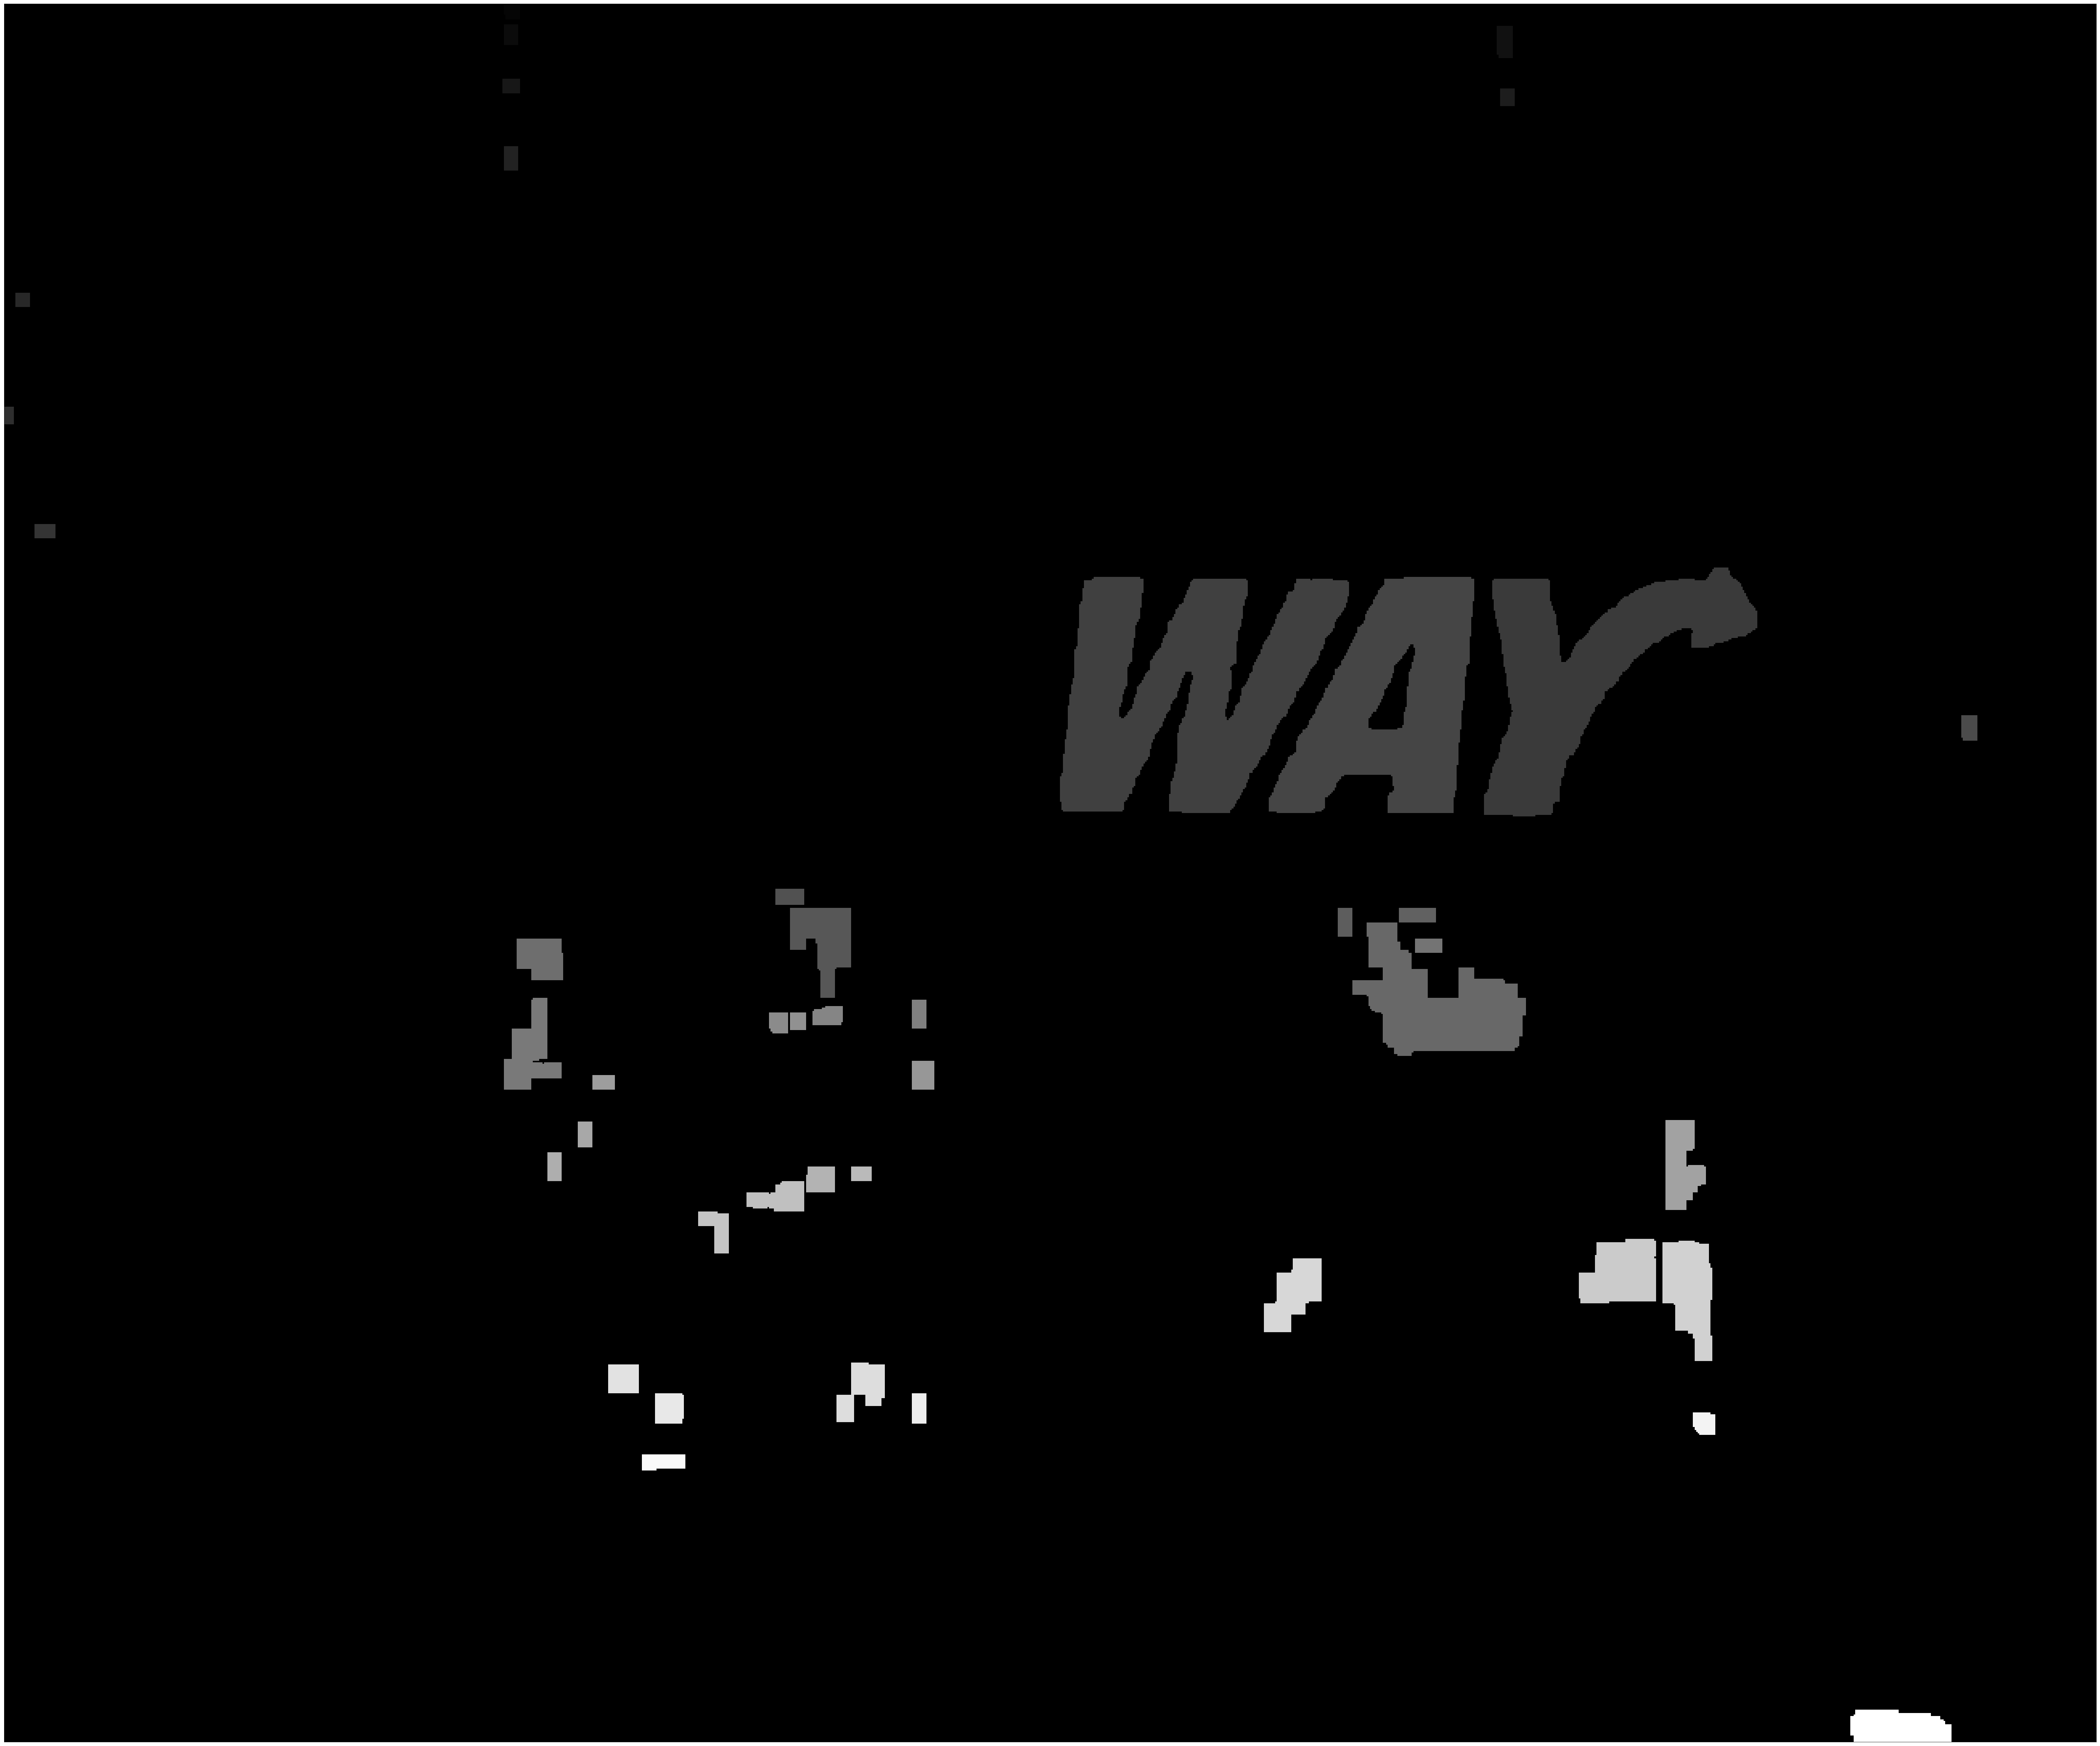

In [153]:
def surrounding(index, shape):
    left = (index[0], index[1] - 1) if (index[1] > 0) else None
    right = (index[0], index[1] + 1) if (index[1] + 1 < shape[1]) else None

    top = (index[0] - 1, index[1]) if (index[0] > 0) else None
    bottom = (index[0] + 1, index[1]) if (index[0] + 1 < shape[0]) else None
    
    directions = [left, top, right, bottom]
    return [d for d in directions if d is not None]

def find_segment(img, result, index, group):
    points = set([index])
    min_x = max_x = index[0]
    min_y = max_y = index[1]
    while(len(points) > 0):
        point = points.pop()
        result[point] = group
        for surround in surrounding(point, img.shape):
            if img[surround] == 255 and result[surround] == 0:
                min_x = min(min_x, surround[0])
                max_x = max(max_x, surround[0])
                min_y = min(min_y, surround[1])
                max_y = max(max_y, surround[1])
                points.add(surround)

    return (np.arange(min_x, max_x), np.arange(min_y, max_y))

def segments(img):
    group = 1

    result = np.zeros_like(img)
    boxes = {}
    it = np.nditer(img, flags=['multi_index'])
    
    while not it.finished:
        if it[0] == 255 and result[it.multi_index] == 0:
            box = find_segment(img, result, it.multi_index, group)
            boxes[group] = box
            group += 1
        it.iternext()
    return (result, boxes)


segs = segments(way)
boxes = segs[1]
segs = segs[0]

plt.figure(figsize=(100,500))
plt.subplot(3,1,1),plt.imshow(segs, cmap="gray")
plt.xticks([]),plt.yticks([])

plt.show()

/Users/wojciechko/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


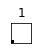

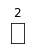

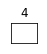

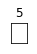

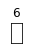

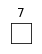

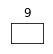

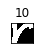

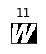

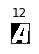

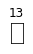

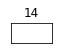

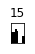

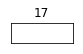

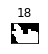

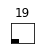

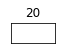

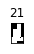

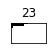

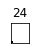

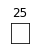

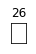

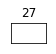

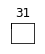

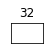

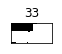

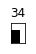

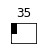

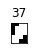

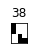

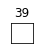

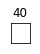

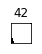

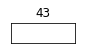

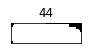

In [151]:
for key in boxes:
    box = boxes[key]
    plt.figure(figsize=(40,20))
    plt.subplot(len(boxes),1,key)
    plt.title(key)
    plt.imshow(np.where(segs == key, 255, 0)[box[0].min():box[0].max(), box[1].min():box[1].max()], cmap="gray", vmin=0, vmax=255)
    plt.xticks([]),plt.yticks([])

plt.show()

In [98]:
np.where(segs == 12, 255, 0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

3097.5129638910294


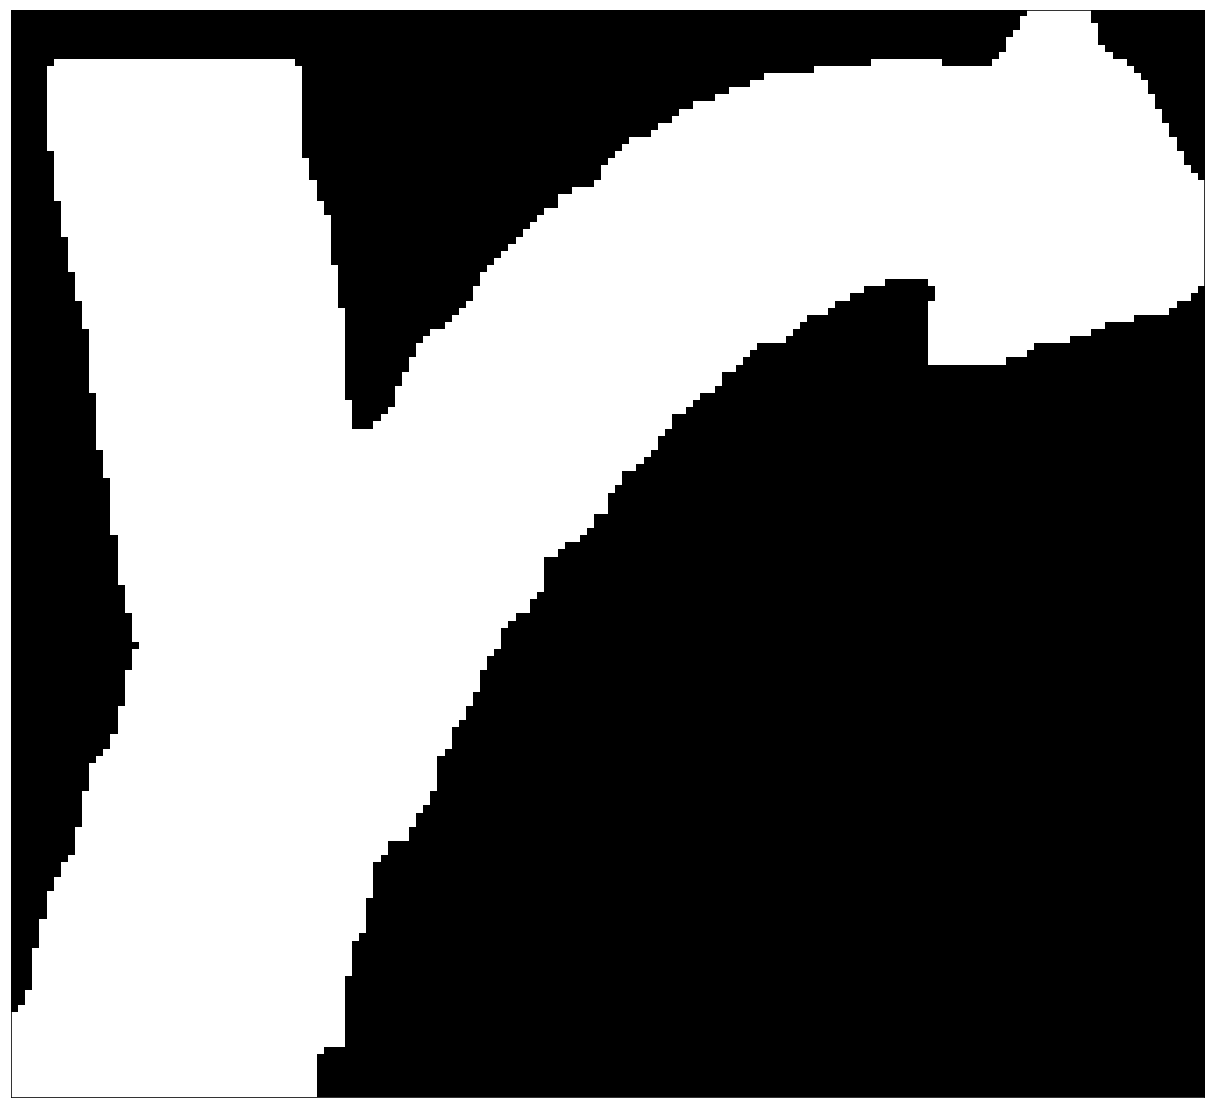

In [185]:
key = 10
box = boxes[key]
segment = np.where(segs == key, 255, 0)[box[0].min():box[0].max(), box[1].min():box[1].max()]

im = cv2.imread('subway_logo.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,230,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]
M = cv2.moments(cnt)

thresh = cv2.drawContours(thresh, cnt, -1, 150, 20)
print(cv2.arcLength(cnt, True))


plt.figure(figsize=(40,20))
plt.subplot(1,1,1)
plt.imshow(segment, cmap="gray", vmin=0, vmax=255)
plt.xticks([]),plt.yticks([])

plt.show()

/Users/wojciechko/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


-11161346.0
-11161346.0


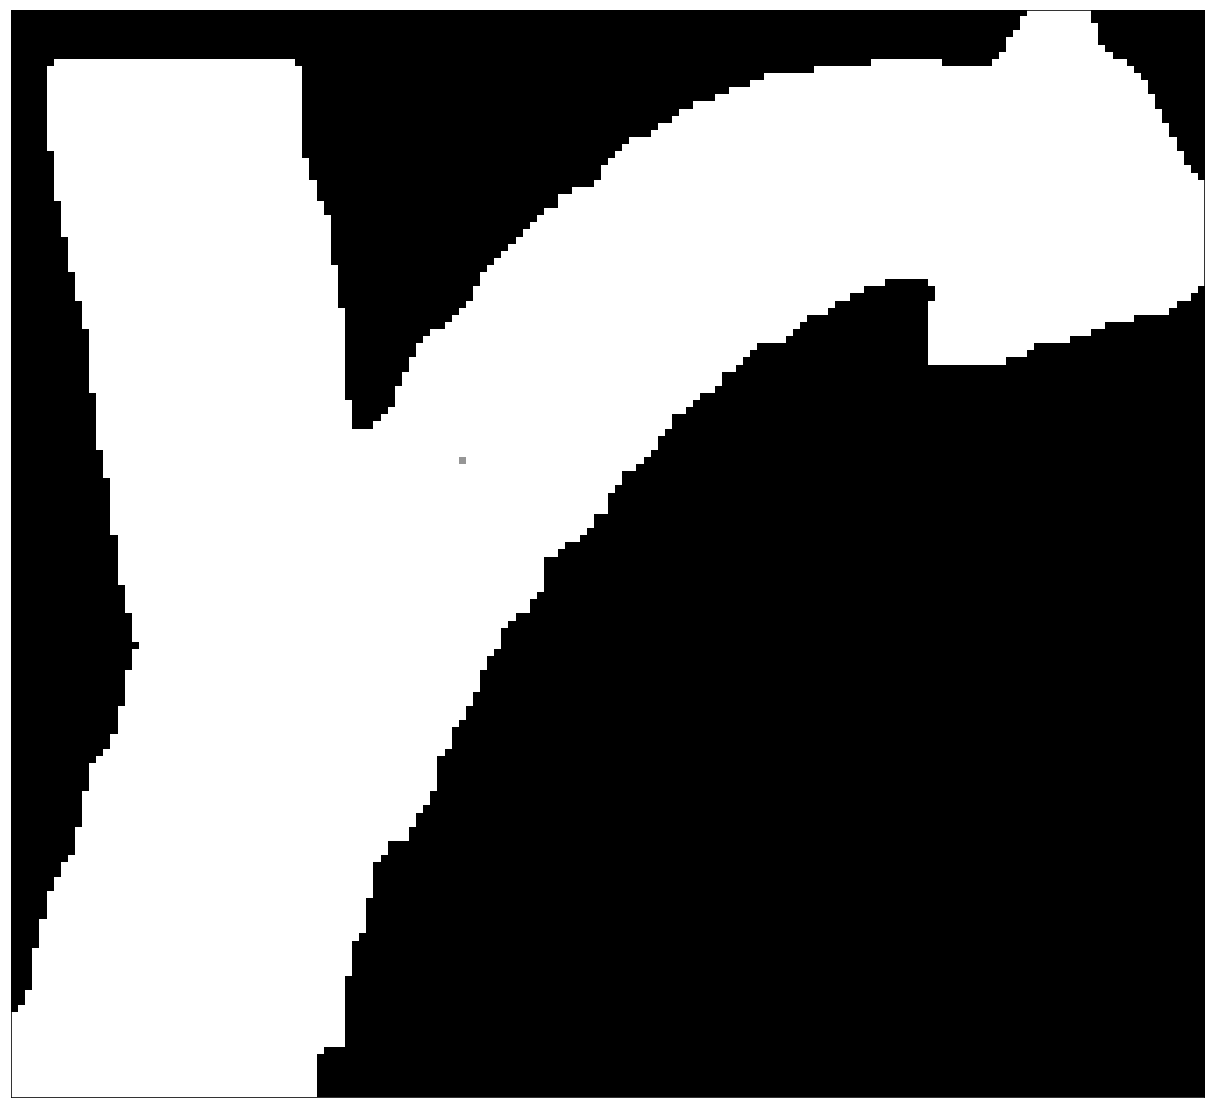

In [245]:
def moment(image, p, q):
    result = 0.0

    it = np.nditer(image, flags=['multi_index'])
    while not it.finished:
        if it[0] == 255:
            y, x = it.multi_index
            result += pow(x, p) * pow(y, q)
        it.iternext()
    return result

def central_moment(image, p, q):
    m_10 = moment(image, 1, 0)
    m_00 = moment(image, 0, 0)
    m_01 = moment(image, 0, 1)

    center_x = int(m_10/m_00)
    center_y = int(m_01/m_00)

    result = 0.0

    it = np.nditer(image, flags=['multi_index'])
    while not it.finished:
        if it[0] == 255:
            y, x = it.multi_index
            result += pow(x - center_x, p) * pow(y - center_y, q)
        it.iternext()
    return result


segment = np.where(segs == key, 255, 0)[box[0].min():box[0].max(), box[1].min():box[1].max()]

moment(segment, 1, 1)

m_10 = moment(segment, 1, 0)
m_00 = moment(segment, 0, 0)
m_01 = moment(segment, 0, 1)


# print(segment)
segment[m_01/m_00, m_10/m_00] = 150
# cv2.circle(np.array(segment), (100,100), 5, [10])
print(central_moment(segment, 1, 1))
print(CentralMoments(segment).central_moment(1,1))
plt.figure(figsize=(40,20))
plt.subplot(1,1,1)
plt.imshow(segment, cmap="gray", vmin=0, vmax=255)
plt.xticks([]),plt.yticks([])

plt.show()

In [188]:
(1, 2)

(1, 2)

In [198]:
a, b = (1, 2)

In [199]:
a

1

In [200]:
b

2

In [288]:
class Moments:
    def __init__(self, image):
        self.memo = {}
        self.image = image

    def M(self, p, q):
        if (p, q) not in self.memo:
            self.memo[(p, q)] = self.calculate_moment(p, q)
        return self.memo[(p, q)]
    
    def calculate_moment(self, p, q):
        result = 0.0

        it = np.nditer(self.image, flags=['multi_index'])
        while not it.finished:
            if it[0] == 255:
                y, x = it.multi_index
                result += (pow(x, p) * pow(y, q))
            it.iternext()

        return result
    
    def center(self):
        m_10 = self.M(1, 0)
        m_00 = self.M(0, 0)
        m_01 = self.M(0, 1)

        return (int(m_01/m_00), int(m_10/m_00))

class CentralMoments:
    def __init__(self, image):
        self.memo = {(0, 1): 0, (1, 0): 0}
        self.image = image
        self.moments = Moments(image)

    def u(self, p, q):
        if (p, q) not in self.memo:
            self.memo[(p, q)] = self.calculate_central_moment(p, q)
        return self.memo[(p, q)]
    
    def calculate_central_moment(self, p, q):
        center_y, center_x = self.moments.center()
        result = 0.0

        it = np.nditer(self.image, flags=['multi_index'])
        while not it.finished:
            if it[0] == 255:
                y, x = it.multi_index
                result += (pow(x - center_x, p) * pow(y - center_y, q))
            it.iternext()

        return result

class NormalizedCentralMoments:
    def __init__(self, image):
        self.memo = {}
        self.image = image
        self.central_moments = CentralMoments(image)

    def n(self, p, q):
        if (p, q) not in self.memo:
            self.memo[(p, q)] = self.calculate(p, q)
        return self.memo[(p, q)]
    
    def calculate(self, p, q):
        exp = ((p + q) / 2) + 1
        return self.central_moments.u(p, q) / pow(self.central_moments.u(0, 0), exp)


class HuInvariants:
    def __init__(self, image):
        self.memo = {}
        self.image = image
        self.invariants = NormalizedCentralMoments(image)

    def invariant_1(self):
        return self.invariants.n(2, 0) + self.invariants.n(0, 2)
    
    def invariant_2(self):
        first_part = pow((self.invariants.n(2, 0) - self.invariants.n(0, 2)), 2)
        second_part = 4 * pow(self.invariants.n(1, 1), 2)
        return first_part + second_part

    def invariant_3(self):
        first_part = pow((self.invariants.n(3, 0) - 3*self.invariants.n(1, 2)), 2)
        second_part = pow(3*self.invariants.n(2, 1) - self.invariants.n(0, 3), 2)
        return first_part + second_part

    def invariant_4(self):
        first_part = pow((self.invariants.n(3, 0) + self.invariants.n(1, 2)), 2)
        second_part = pow(self.invariants.n(2, 1) + self.invariants.n(0, 3), 2)
        return first_part + second_part

    def invariant_5(self):
        first_part_1 = 3*self.invariants.n(2, 1) + self.invariants.n(0, 3)
        first_part_2 = self.invariants.n(2, 1) + self.invariants.n(0, 3)
        first_part_3 = pow((self.invariants.n(3, 0) + self.invariants.n(1, 2)), 2) - 3*pow((self.invariants.n(2, 1) + self.invariants.n(0, 3)), 2)
        first_part = first_part_1 * first_part_2 * first_part_3

        second_part_1 = self.invariants.n(3, 0) + 3*self.invariants.n(1, 2)
        second_part_2 = self.invariants.n(3, 0) + self.invariants.n(1, 2)
        second_part_3 = 3*pow((self.invariants.n(3, 0) + self.invariants.n(1, 2)), 2) - pow((self.invariants.n(2, 1) + self.invariants.n(0, 3)), 2)
        second_part = second_part_1 * second_part_2 * second_part_3

        return first_part + second_part


In [290]:
print(HuInvariants(segment).invariant_2())

0.03905283814561343


In [287]:
m = Moments(segment)
m.moment(1, 1) - (m.moment(1, 0) * m.moment(0, 1)) / m.moment(0,0)

AttributeError: 'Moments' object has no attribute 'moment'

In [310]:
np.array([1, 2]) - np.array((3,2))

array([-2,  0])

In [316]:
[(x,y) for x in range(10, 15) for y in range(1,5)] 



[(10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (12, 1),
 (12, 2),
 (12, 3),
 (12, 4),
 (13, 1),
 (13, 2),
 (13, 3),
 (13, 4),
 (14, 1),
 (14, 2),
 (14, 3),
 (14, 4)]

In [408]:
r = 1
size = r*2 + 1

y,x = np.ogrid[-r:size-r, -r:size-r]
mask = x*x + y*y <= r*r

array = np.ones_like(mask)
array[2] = 12
array[mask == True] = 12
array[mask == False]
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(mask[:2,:])
print(arr)
# print(array)
# array[mask] = 255
# array
# mask

[[False  True False]
 [ True  True  True]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [422]:
mask[0:3, 1:2]

array([[ True],
       [ True],
       [ True]], dtype=bool)

In [412]:
print(list(range(1, 4)))

[1, 2, 3]


In [450]:
mask = [[True,  True,  True], [False,  True, False]]
arr = [(0, 30), (0, 31), (0, 32), (1, 30), (1, 31), (1, 32)]
arr = np.array(arr, dtype=[('row', np.int), ('column', np.int)])
arr[np.array(mask).flatten()]

array([(0, 30), (0, 31), (0, 32), (1, 31)], 
      dtype=[('row', '<i8'), ('column', '<i8')])

In [469]:
mask = np.array([False, True, False, True])

np.array([(0, 30), (0, 31), (0, 32), (1, 31)])[1]

array([ 0, 31])

In [453]:
type((1, 2)).__name__

'tuple'

In [470]:
np.array([[[1, 2, 3],[1,2,2]]])

array([[[1, 2, 3],
        [1, 2, 2]]])